<a href="https://colab.research.google.com/github/jcval94/Out-of-the-box/blob/master/Distribuciones_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import seaborn as sns
from tensorflow.keras.layers import Input, Concatenate
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.layers import LSTM 
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

In [ ]:


iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

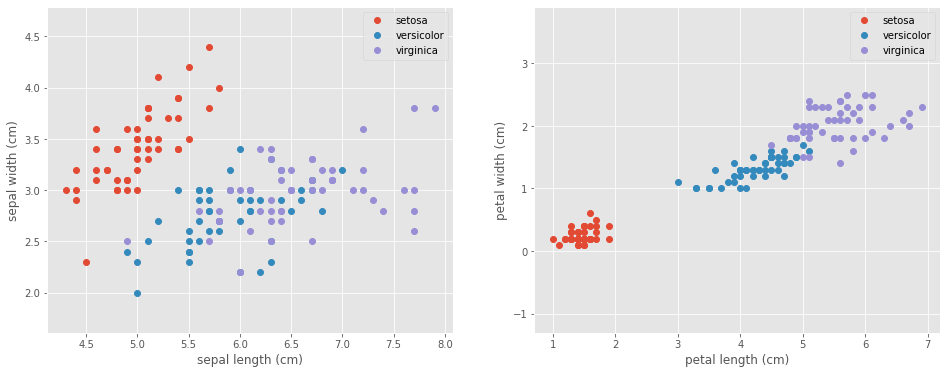

In [ ]:
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

## Creacion de las normales

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

COLS = list(range(0,500))+['mu','sigma']
df = pd.DataFrame(columns=COLS)

for i in range(250):
  mu, sigma = np.random.uniform(low=0, high=100, size=2)
  s = np.random.normal(mu, sigma, 500)
  df_length = len(df)
  df.loc[df_length] = list(sorted(np.random.normal(mu, sigma, 500)))+[mu, sigma]

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,mu,sigma
0,-53.261197,-52.436642,-49.657046,-45.821354,-38.859805,-38.102756,-37.224944,-36.853551,-35.752429,-34.892319,-33.332571,-32.523481,-32.371410,-32.344313,-31.868957,-31.175624,-28.423245,-27.477182,-27.419918,-26.564546,-25.735689,-25.108360,-23.322271,-23.290260,-23.286082,-22.242638,-21.974116,-21.728708,-21.127510,-21.047661,-21.035966,-20.851163,-20.010936,-19.918000,-19.731229,-19.454958,-19.415524,-19.183888,-19.118785,-19.056176,...,55.811426,56.730155,57.100680,57.176468,57.205738,57.471937,58.358763,58.665835,58.782022,58.974836,59.435173,59.629743,59.633821,59.916090,60.225265,60.456481,61.239729,61.822961,63.488417,64.487125,66.113310,66.176353,66.498515,67.123600,67.180393,67.269515,69.425291,70.660535,71.049488,71.118621,72.916776,74.049504,76.903554,77.681663,81.619190,81.972352,84.448254,89.737957,18.617354,25.761274
1,-246.249180,-208.505087,-170.205307,-166.622355,-166.016269,-165.120955,-164.761766,-162.265284,-160.415825,-143.584961,-142.888816,-142.831444,-141.461153,-140.136600,-138.913974,-136.134021,-135.107449,-134.522939,-131.593535,-129.742692,-129.538608,-126.511980,-125.135151,-124.289488,-124.024339,-123.908750,-119.448191,-112.391204,-108.987211,-102.550430,-102.426376,-101.640578,-100.304751,-97.682160,-94.844792,-93.926600,-92.797030,-92.145813,-92.101975,-91.759571,...,178.382504,179.421089,182.414486,183.475862,184.381811,185.473573,187.066441,187.645481,188.510384,189.389865,190.607827,191.535759,193.299665,197.027214,198.092839,204.469733,204.724239,210.378050,211.046775,213.079922,213.687029,216.390914,217.771823,220.439401,223.650024,224.139931,224.769496,230.138802,232.099684,238.292387,240.506325,245.139857,248.605345,269.794008,279.437120,293.165786,302.361061,404.301301,43.875710,95.721118
2,-214.529472,-201.660929,-176.464664,-173.575989,-162.767885,-152.295582,-151.523891,-147.486827,-143.988558,-138.445473,-137.549625,-136.647709,-136.627680,-136.598218,-134.756158,-129.261733,-123.078383,-122.769046,-121.431371,-117.340355,-112.729272,-110.658777,-110.071178,-106.364135,-106.305571,-104.035938,-103.255837,-102.044225,-101.548722,-99.081994,-98.514660,-98.031843,-94.956201,-93.708567,-92.928556,-91.847989,-90.804654,-90.463480,-88.825632,-88.801172,...,144.468260,146.707031,146.983397,147.344891,148.029455,148.492093,149.553218,149.988333,152.327690,154.201123,156.490742,157.663761,158.865659,160.289513,161.565743,162.243145,163.266279,164.404110,167.102280,170.321733,173.743818,176.024068,176.583458,177.965476,179.108726,179.800538,185.531890,186.900503,192.950609,196.085495,201.612639,202.529471,204.525510,204.965094,211.597087,235.280489,236.975917,238.707493,23.565797,76.718720
3,-291.220154,-242.315812,-241.529243,-233.385432,-225.216603,-218.992301,-218.720023,-213.672005,-208.319570,-199.610467,-198.475121,-197.758529,-194.690878,-192.855764,-188.775856,-185.760830,-185.131056,-184.457940,-182.693035,-182.379851,-181.539777,-174.915215,-166.834127,-166.364564,-162.269436,-161.870322,-153.263023,-152.450763,-151.628079,-151.022590,-144.208441,-142.776310,-142.711028,-141.425108,-141.270529,-137.967369,-135.761525,-135.309875,-134.752954,-134.574916,...,147.355263,149.187404,149.247296,150.477155,150.610384,152.076156,156.379873,159.594973,160.643039,161.194909,161.219755,161.750727,163.385356,163.502980,164.466584,165.528860,166.082037,166.511040,167.640939,169.949210,173.213136,176.813038,180.069765,196.145942,196.989088,197.808582,201.223841,203.450846,206.501627,209.165947,209.235760,209.940222,211.078513,226.576719,244.971328,246.567043,248.011400,251.337953,5.094230,96.818013
4,-97.488186,-51.408538,-50.330406,-49.277410,-47.599787,-36.031509,-35.732454,-30.907245,-27.786798,-27.078861,-26.857265,-2

In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:499]
y = df.iloc[:,501]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model = Sequential()
model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 499)               249500    
_________________________________________________________________
dense_20 (Dense)             (None, 50)                25000     
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 255       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 6         
Total params: 274,761
Trainable params: 274,761
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(X_train, y_train, epochs=25, verbose=1, validation_split=0.2)
predictions = model.predict(X_test)

Epoch 1/25
5/5 [==============================] - 1s 77ms/step - loss: 7902.9572 - mse: 7902.9572 - mae: 62.7063 - val_loss: 2389.8730 - val_mse: 2389.8730 - val_mae: 40.8068
Epoch 2/25
5/5 [==============================] - 0s 12ms/step - loss: 997.2871 - mse: 997.2871 - mae: 25.7668 - val_loss: 564.6411 - val_mse: 564.6411 - val_mae: 18.8505
Epoch 3/25
5/5 [==============================] - 0s 12ms/step - loss: 736.3344 - mse: 736.3344 - mae: 21.9823 - val_loss: 545.2746 - val_mse: 545.2746 - val_mae: 21.1791
Epoch 4/25
5/5 [==============================] - 0s 13ms/step - loss: 263.6153 - mse: 263.6153 - mae: 13.6588 - val_loss: 496.6542 - val_mse: 496.6542 - val_mae: 19.8605
Epoch 5/25
5/5 [==============================] - 0s 13ms/step - loss: 221.4394 - mse: 221.4394 - mae: 11.5343 - val_loss: 329.9279 - val_mse: 329.9279 - val_mae: 15.6407
Epoch 6/25
5/5 [==============================] - 0s 14ms/step - loss: 147.0811 - mse: 147.0811 - mae: 10.1671 - val_loss: 87.9902 - val_mse:

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


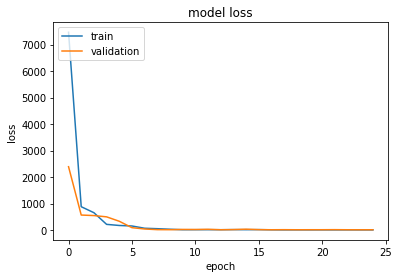

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(mean_absolute_error(y_test, predictions))
print(mean_squared_error(y_test, predictions))

1.2074146826842784
3.2280692612372146


In [ ]:
resul = pd.DataFrame(columns=['y_test','pred'])
resul['y_test'] = y_test
resul['pred'] = predictions
resul

,y_test,pred
142,11.749781,12.234631
6,3.034525,3.550919
97,16.705008,16.074200
60,39.379640,42.008999
112,65.606123,68.294640
...,...,...
79,53.927495,58.269737
86,18.110482,18.766750
5,65.007505,64.065269
56,77.731294,78.188873


# Modelo bimodal

In [ ]:
import numpy as np
import pandas as pd
COLS = list(range(0,500*2-1))+['mu_1','sigma_1','mu_2','sigma_2']
df = pd.DataFrame(columns=COLS)

for i in range(2500):
  mu1, sigma1 = np.random.uniform(low=0, high=100, size=2)
  mu2, sigma2 = np.random.uniform(low=0, high=100, size=2)
  s1 = np.random.normal(mu1, sigma1, 250).tolist()
  s2 = np.random.normal(mu2, sigma2, 250).tolist()
  df_length = len(df)
  df.loc[df_length] = list(sorted(s1+s2)+list(np.diff(sorted(s1+s2))))+[mu1, sigma1, mu2, sigma2]

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,mu_1,sigma_1,mu_2,sigma_2
0,-126.522487,-96.555749,-71.740015,-61.364371,-46.054973,-43.557542,-35.028795,-34.076151,-32.861677,-29.527084,-22.333200,-16.430654,-12.418944,-10.183705,-8.854056,-8.374244,-4.786789,-3.885536,-0.859768,4.939618,5.917732,6.224622,7.148690,8.624156,9.421308,10.045811,13.003358,14.186039,15.048448,16.206634,21.007974,21.367358,22.134859,25.342341,25.541230,26.944657,27.340580,27.978166,28.299050,28.707262,...,6.043415,1.449781,0.395330,3.558583,0.930077,0.270702,0.558215,0.515485,1.411383,0.641533,1.902995,0.159092,6.092889,0.278696,2.483987,0.759163,0.493264,3.910552,0.298630,4.372208,4.804482,0.822932,4.578416,0.426344,1.854440,1.782986,0.644672,6.479217,1.924275,3.250056,1.214312,3.166161,0.887599,8.580750,20.957620,27.428495,99.974925,68.556287,62.345862,9.039732
1,-185.758997,-183.392826,-164.902979,-139.754413,-130.902804,-129.722117,-128.422563,-120.290072,-119.332415,-109.244538,-107.826107,-104.895426,-98.124316,-94.010449,-93.810524,-89.312281,-89.262635,-77.211024,-77.081225,-75.918266,-74.899619,-74.106916,-73.068471,-70.838500,-70.520698,-68.603948,-65.564017,-65.552963,-65.327297,-59.628342,-59.097896,-58.502967,-57.685890,-57.581657,-56.043439,-54.993365,-54.213674,-51.902081,-50.803269,-50.578784,...,0.647938,0.816253,0.101666,0.445694,5.049632,1.632485,5.071783,0.774401,3.091621,0.173267,0.352778,1.387783,0.701890,2.728090,0.536560,0.434543,0.075854,1.756620,5.626156,1.775661,4.495152,5.316362,0.112431,0.538919,2.086125,3.963570,4.038236,1.780545,2.503714,2.703856,1.302272,0.302775,9.485369,1.352212,21.325312,19.660544,67.577727,51.259043,35.745321,78.050721
2,-257.205400,-223.372667,-200.677016,-200.285777,-199.834186,-195.552981,-190.794343,-185.287309,-182.637825,-180.378067,-160.594359,-155.799706,-149.314724,-148.385571,-148.346230,-145.675771,-144.875567,-136.463218,-134.591877,-131.701348,-126.393389,-125.999640,-125.086005,-120.944424,-118.360822,-116.306280,-113.949093,-109.908923,-108.386929,-108.278047,-106.759375,-104.463781,-99.170794,-98.411308,-97.931244,-96.606301,-96.593577,-95.509406,-94.916848,-93.383299,...,4.499757,0.496363,0.156013,2.869715,0.489610,2.354209,2.220548,3.644017,2.980452,7.282565,1.276247,0.090723,1.485009,0.609584,6.298349,0.111363,0.148863,8.532083,3.864821,0.159712,1.230282,2.917209,0.409051,10.960398,0.899824,0.060658,3.830581,1.303440,6.768187,7.965359,2.361555,6.096927,3.927189,5.083159,2.277887,80.483481,19.270728,98.045438,41.584602,70.022591
3,-287.920683,-253.631475,-186.408370,-175.693306,-160.648732,-148.803621,-146.837888,-141.766095,-138.152673,-128.833257,-126.258791,-124.254492,-120.245884,-119.184798,-118.394963,-116.980972,-116.366962,-113.224317,-111.972391,-111.746576,-110.007146,-99.630500,-97.713875,-95.581518,-92.173014,-87.955604,-83.281922,-83.006860,-79.194934,-77.504116,-76.667616,-75.693256,-74.084655,-73.943395,-73.250720,-73.183835,-72.723649,-71.699333,-71.442911,-67.750962,...,0.382819,2.357352,0.775511,0.865914,1.705889,3.262054,0.326573,0.112127,0.206092,0.189904,3.111231,4.333665,2.574576,2.024820,0.370172,2.595438,4.120008,3.396345,3.559089,0.712843,1.310501,0.183618,0.049185,1.744325,1.972565,0.489618,3.588029,0.322017,3.503013,0.105206,11.070908,0.602858,0.409398,17.530614,4.045516,16.684472,13.035224,86.102987,45.126552,25.249650
4,-116.186887,-107.250553,-80.306607,-69.173545,-64.009031,-55.420162,-51.473239,-41.941714,-38.629731,-38.509189,-36.585679,-36.236838,-32.709716,-28.116128,-26.991240,-26.839957,-26.262284,-26.127551,-25.057528,-23.888968,-21.171464,-19.691273,-19.142138,-17.330757,-17.098168,-16.516393,-11.798642,-10.955908,-5.834049,-5.694680,-4.606591,-3.654106,-3.230605,-2.964289,-2.571456,-0.129408,0.058206,0.595583,1.100374,1.560066,...,0

In [ ]:
#idea percentiles

## idea percentiles

In [ ]:
import numpy as np
import pandas as pd
COLS = list(range(0,500*2-1))+['mu_1','sigma_1','mu_2','sigma_2']
df = pd.DataFrame(columns=COLS)

for i in range(2500):
  mu1, sigma1 = np.random.uniform(low=0, high=100, size=2)
  mu2, sigma2 = np.random.uniform(low=0, high=100, size=2)
  s1 = np.random.normal(mu1, sigma1, 250).tolist()
  s2 = np.random.normal(mu2, sigma2, 250).tolist()
  df_length = len(df)
  df.loc[df_length] = list(sorted(s1+s2)+list(np.diff(sorted(s1+s2))))+[mu1, sigma1, mu2, sigma2]

df.head()

In [ ]:
X = df.iloc[:,:(len(df.columns)-4)]
y = df.iloc[:,(len(df.columns)-3)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from tensorflow.keras.layers import Conv2D,Conv1D

In [ ]:
model = Sequential()
model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

# model.add(LSTM(128, input_shape=(X_train.shape[1],1), return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(64, return_sequences=True))
# model.add(Dropout(0.1))
# model.add(BatchNormalization())
# model.add(Conv1D(filters=64, kernel_size=1,  activation='relu',input_shape=(X_train.shape[1],1)))

model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='elu'))
model.add(Dense(10, activation='elu'))
model.add(Dense(1, activation='linear'))
# model.add(Dense(1, activation='softmax')) # mse: 3278.2609 - mae: 49.5778

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 999)               999000    
_________________________________________________________________
dense_50 (Dense)             (None, 250)               250000    
_________________________________________________________________
dense_51 (Dense)             (None, 100)               25100     
_________________________________________________________________
dropout_21 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_53 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_54 (Dense)             (None, 10)              

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
import datetime
logdir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = TensorBoard(log_dir= logdir)

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit((X_train), y_train, #np.expand_dims
                  epochs=40, verbose=1,
                  validation_split=0.2,
                  callbacks=[tensorboard])
predictions = model.predict((X_test))

Epoch 1/40
42/42 [==============================] - 1s 11ms/step - loss: 1460.4354 - mse: 1460.4354 - mae: 29.1038 - val_loss: 561.5880 - val_mse: 561.5880 - val_mae: 19.9940
Epoch 2/40
42/42 [==============================] - 0s 5ms/step - loss: 561.3946 - mse: 561.3946 - mae: 19.2704 - val_loss: 505.4421 - val_mse: 505.4421 - val_mae: 19.0930
Epoch 3/40
42/42 [==============================] - 0s 4ms/step - loss: 477.4393 - mse: 477.4393 - mae: 17.6564 - val_loss: 483.1133 - val_mse: 483.1133 - val_mae: 18.5421
Epoch 4/40
42/42 [==============================] - 0s 5ms/step - loss: 482.6644 - mse: 482.6644 - mae: 17.9739 - val_loss: 524.0137 - val_mse: 524.0137 - val_mae: 19.2518
Epoch 5/40
42/42 [==============================] - 0s 4ms/step - loss: 502.0231 - mse: 502.0231 - mae: 18.2021 - val_loss: 602.3055 - val_mse: 602.3055 - val_mae: 20.4734
Epoch 6/40
42/42 [==============================] - 0s 4ms/step - loss: 477.8638 - mse: 477.8638 - mae: 17.8100 - val_loss: 618.6868 - va

In [ ]:
%load_ext tensorboard

In [ ]:
# !kill 1009
%tensorboard --logdir logs/fit

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


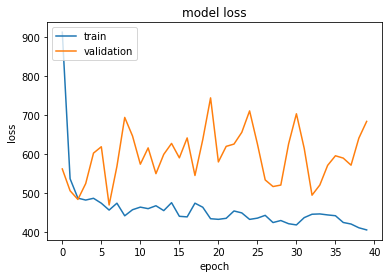

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
len(y_test)

825

In [ ]:
predictions[0][0]

array([40.053806], dtype=float32)

In [ ]:
predictions[4][0]

array([34.98766], dtype=float32)

In [ ]:
len([ln[0] for ln in predictions[0].tolist()])

999

In [ ]:
print(mean_absolute_error(y_test, [ln[0] for ln in predictions[0].tolist()]))
print(mean_squared_error(y_test, [ln[0] for ln in predictions[0].tolist()]))

In [ ]:
resul = pd.DataFrame(columns=['y_test','pred'])
resul['y_test'] = y_test
resul['pred'] = predictions
resul

# Idea por distribución

In [ ]:
COLS = list(range(0,500*2-1))+['mu_1','sigma_1','mu_2','sigma_2']
df = pd.DataFrame(columns=COLS)

evidencia = []
resultados = []

for i in range(2500):
  mu1, sigma1 = np.random.uniform(low=0, high=100, size=2)
  mu2, sigma2 = np.random.uniform(low=0, high=100, size=2)
  s1 = np.random.normal(mu1, sigma1, 250).tolist()
  s2 = np.random.normal(mu2, sigma2, 250).tolist()

  dplot = sns.distplot(sorted(s1+s2), kde=True, bins = 45)
  coords = dplot.get_lines()[0].get_data()
  barras = [h.get_height() for h in dplot.patches]
  plt.close()

  evidencia.append([coords[0],
                    coords[1],
                    np.array(barras)
                    ])
  resultados.append([mu1, sigma1, mu2, sigma2])

In [113]:
X = evidencia.copy()
y = resultados.copy()
X_train, X_test, y_train, y_test = train_test_split(evidencia, resultados, test_size=0.33, random_state=42)

In [164]:
input1 = Input(shape=(len(coords[1]),))
input2 = Input(shape=(len(coords[1]),))
input3 = Input(shape=(len(barras),))
merged = Concatenate(axis=1)([input1, input2, input3])
dense1 = Dense(328, input_dim=3, activation='sigmoid', use_bias=True)(merged)
dense2 = Dense(64, activation='relu')(dense1)
# dense3 = Dense(32, activation='relu', use_bias=True)(dense2)
# dense4 = Dense(8, activation='relu', use_bias=True)(dense3)
output = Dense(2, activation='relu')(dense2)
model10 = keras.models.Model(inputs=[input1, input2, input3], outputs=output)
model10.summary()

Model: "model_27"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_76 (InputLayer)           [(None, 200)]        0                                            
__________________________________________________________________________________________________
input_77 (InputLayer)           [(None, 200)]        0                                            
__________________________________________________________________________________________________
input_78 (InputLayer)           [(None, 45)]         0                                            
__________________________________________________________________________________________________
concatenate_29 (Concatenate)    (None, 445)          0           input_76[0][0]                   
                                                                 input_77[0][0]            

In [165]:
inp1=[]
inp3=[]
inp2=[]

for a in X_train:
  inp1.append(a[0].tolist())
  inp2.append(a[1].tolist())
  inp3.append(a[2].tolist())

outp1 = []
outp2 = []

for b in y_train:
  outp1.append([b[0],b[2]])
  outp2.append(b[2])

inp1 = np.array(inp1)
inp2 = np.array(inp2)
inp3 = np.array(inp3)

outp1 = np.asarray(outp1)
# print(len(inp1))
# print(len(inp2))
# print(len(inp3))
# print(len(outp1))

In [148]:
# print('inp')
# [print(i.shape, i.dtype) for i in model10.inputs]
# print('out')
# [print(o.shape, o.dtype) for o in model10.outputs]
# print('lay')
# [print(l.name, l.input_shape, l.dtype) for l in model10.layers]

In [166]:
from tensorflow.keras.callbacks import TensorBoard
import datetime
logdir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = TensorBoard(log_dir= logdir)

model10.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

history=model10.fit([inp1,inp2,inp3], outp1, 
                  epochs=30, 
                  verbose=1,
                  validation_split=0.2,
                  callbacks=[tensorboard])

# predictions = model10.predict((X_test))

Epoch 1/30
42/42 [==============================] - 1s 9ms/step - loss: 2673.9661 - mse: 2673.9661 - mae: 43.5385 - val_loss: 1036.9479 - val_mse: 1036.9479 - val_mae: 27.0122
Epoch 2/30
42/42 [==============================] - 0s 4ms/step - loss: 917.7511 - mse: 917.7511 - mae: 25.5704 - val_loss: 835.2726 - val_mse: 835.2726 - val_mae: 24.9368
Epoch 3/30
42/42 [==============================] - 0s 4ms/step - loss: 814.2791 - mse: 814.2791 - mae: 24.6065 - val_loss: 818.2994 - val_mse: 818.2994 - val_mae: 24.7143
Epoch 4/30
42/42 [==============================] - 0s 4ms/step - loss: 781.8000 - mse: 781.8000 - mae: 23.9849 - val_loss: 799.7054 - val_mse: 799.7054 - val_mae: 24.4666
Epoch 5/30
42/42 [==============================] - 0s 4ms/step - loss: 765.8150 - mse: 765.8150 - mae: 23.8060 - val_loss: 787.5977 - val_mse: 787.5977 - val_mae: 24.2803
Epoch 6/30
42/42 [==============================] - 0s 4ms/step - loss: 768.8379 - mse: 768.8379 - mae: 24.0049 - val_loss: 786.8314 - v

In [159]:
## Ejemplo pedorro

# import numpy as np
# from tensorflow import keras
# from tensorflow.keras import layers


# inputA = layers.Input(shape=(2,))
# xA = layers.Dense(8, activation='relu')(inputA)

# inputB = layers.Input(shape=(3,))
# xB = layers.Dense(8, activation='relu')(inputB)

# merged = layers.Concatenate()([xA, xB])

# output = layers.Dense(1, activation='linear')(merged)    

# model = keras.Model(inputs=[inputA, inputB], outputs=output)

# a = np.array([[1, 2], [2,3], [4,6]])#.reshape(1,-1)
# b = np.array([[3, 4, 5], [6,8,3], [35,2,43]])#.reshape(1,-1)

# model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
# model.fit([a,b], np.array([0,1,2]), epochs=2)


# model.predict([a, b])